In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_gene_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_ortho_trimmed_out_2_gene_families.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_gene_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_ortho_trimmed_out_2_gene_families.csv', index_col= 0)

In [3]:
log_fc_change_evaluation_value = 1.5
log_fc_change_evaluation_value_negative = -1*log_fc_change_evaluation_value

In [4]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10077at3193,120.135696,-0.319990,0.224932,-1.422608,1.548497e-01,2.342983e-01
10217at3193,288.475068,-0.145039,0.152624,-0.950305,3.419571e-01,4.424118e-01
10493at3193,46.824601,-0.043082,0.237494,-0.181403,8.560515e-01,8.921835e-01
10648at3193,1901.086442,-0.023699,0.181959,-0.130246,8.963720e-01,9.215942e-01
10653at3193,11420.863573,0.074602,0.080454,0.927264,3.537893e-01,4.547710e-01
...,...,...,...,...,...,...
97899at3193,153.583462,-0.058115,0.153068,-0.379665,7.041939e-01,7.747185e-01
9789at3193,472.284900,0.376672,0.101837,3.698771,2.166460e-04,7.323885e-04
9797at3193,46.154756,0.401132,0.373458,1.074102,2.827771e-01,3.798955e-01
9942at3193,3490.839982,-0.146726,0.068008,-2.157474,3.096876e-02,6.021718e-02


In [5]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


In [6]:
trimmed_arabi_ortho_named = trimmed_arabi_ortho.rename(columns = {'log2FoldChange':'Arabidopsis Log2FC'})
trimmed_tomato_ortho_named = trimmed_tomato_ortho.rename(columns = {'log2FoldChange':'Tomato Log2FC'})



In [7]:
merged_ortho_df = trimmed_arabi_ortho_named[['Arabidopsis Log2FC']].merge(right = trimmed_tomato_ortho_named, left_index= True, right_index = True)

In [8]:
merged_ortho_df

,Arabidopsis Log2FC,baseMean,Tomato Log2FC,lfcSE,stat,pvalue,padj
10217at3193,0.054831,288.475068,-0.145039,0.152624,-0.950305,3.419571e-01,4.424118e-01
10648at3193,-0.092506,1901.086442,-0.023699,0.181959,-0.130246,8.963720e-01,9.215942e-01
10653at3193,-0.769619,11420.863573,0.074602,0.080454,0.927264,3.537893e-01,4.547710e-01
10772at3193,-0.563822,2675.289691,-0.647447,0.066251,-9.772656,1.475328e-22,5.938195e-21
10787at3193,-0.445230,770.607696,-0.407818,0.284252,-1.434706,1.513709e-01,2.296416e-01
...,...,...,...,...,...,...,...
9609at3193,0.036704,33.936234,2.262803,0.313373,7.220789,5.168661e-13,7.459088e-12
9789at3193,0.168016,472.284900,0.376672,0.101837,3.698771,2.166460e-04,7.323885e-04
9797at3193,0.728854,46.154756,0.401132,0.373458,1.074102,2.827771e-01,3.798955e-01
9942at3193,-0.288193,3490.839982,-0.146726,0.068008,-2.157474,3.096876e-02,6.021718e-02


In [9]:
log_fc_change_evaluation_value

1.5

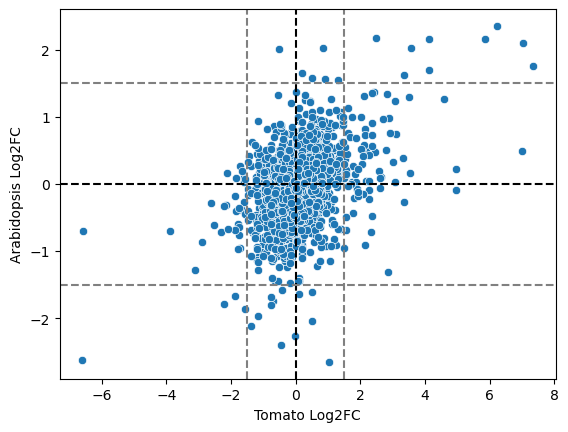

In [10]:
sns.scatterplot(data = merged_ortho_df, x ='Tomato Log2FC', y = 'Arabidopsis Log2FC' )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Orthogroup-wise log2-fold change in \n Sorghum Drought')

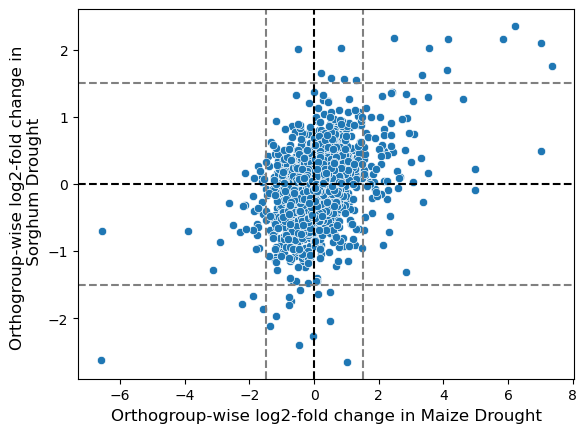

In [12]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Orthogroup-wise log2-fold change in Maize Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in \n Sorghum Drought", fontsize = 12)

In [362]:
trimmed_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10217at3193,500.454918,0.054831,0.117757,0.465624,6.414844e-01,7.869342e-01
10648at3193,2079.067086,-0.092506,0.102725,-0.900527,3.678398e-01,5.712790e-01
10653at3193,1000.920143,-0.769619,0.131578,-5.849167,4.940411e-09,2.920771e-07
10772at3193,2770.186875,-0.563822,0.140192,-4.021787,5.775832e-05,7.576934e-04
10787at3193,1132.746619,-0.445230,0.098965,-4.498843,6.832431e-06,1.294658e-04
...,...,...,...,...,...,...
9609at3193,419.782108,0.036704,0.637675,0.057559,9.541000e-01,9.785980e-01
9789at3193,1274.388025,0.168016,0.091883,1.828594,6.746046e-02,1.829478e-01
9797at3193,1371.992557,0.728854,0.251971,2.892605,3.820612e-03,2.205807e-02
9942at3193,3611.103502,-0.288193,0.082595,-3.489252,4.843746e-04,4.374169e-03


In [363]:
all(trimmed_arabi_ortho.index == trimmed_tomato_ortho.index)

True

In [364]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]

In [365]:
merged_result['Classification'] = 'Non-substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_2387550/2994845458.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = '

Text(0, 0.5, 'Orthogroup-wise log2-fold change in Sorghum Drought')

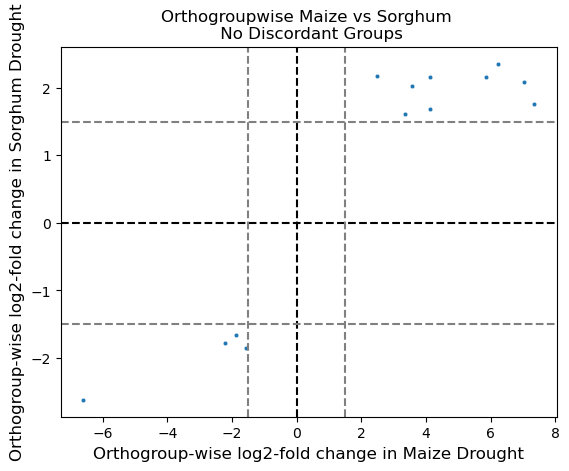

In [366]:
sns.scatterplot(data = merged_result.loc[merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Orthogroupwise Maize vs Sorghum \n No Discordant Groups')
plt.xlabel("Orthogroup-wise log2-fold change in Maize Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in Sorghum Drought", fontsize = 12)

In [367]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

ZeroDivisionError: division by zero

In [368]:
discord_bottom

,Tomato,Arabi


In [369]:
discord_top

,Tomato,Arabi


In [13]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1
neg_thresh = 1
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.949438202247191
0.949438202247191
0.949438202247191
0.949438202247191


In [14]:
arabi_disconcordant_change

,Tomato,Arabi
43,1.352919,0.515113
45,1.882284,-0.072345
75,1.088673,0.034604
79,1.727598,0.021319
125,0.205842,1.644674
...,...,...
3157,1.201435,0.002519
3159,2.069497,0.421890
3179,1.467840,0.997502
3197,2.705647,0.964804


In [15]:
tomato_any_change

,Tomato,Arabi
0,-0.145039,0.054831
1,-0.023699,-0.092506
2,0.074602,-0.769619
3,-0.647447,-0.563822
4,-0.407818,-0.445230
...,...,...
3199,2.262803,0.036704
3200,0.376672,0.168016
3201,0.401132,0.728854
3202,-0.146726,-0.288193


In [16]:
tomato_concordant_change

,Tomato,Arabi
0,-0.145039,0.054831
1,-0.023699,-0.092506
2,0.074602,-0.769619
3,-0.647447,-0.563822
4,-0.407818,-0.445230
...,...,...
3198,0.020467,-0.064924
3200,0.376672,0.168016
3201,0.401132,0.728854
3202,-0.146726,-0.288193


In [17]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species/sorghum_to_maize_ortholog_NM.csv')

In [18]:
arabidopsis_tomato_nm

,sorghum OrthoGene,maize OrthoGene,Orthogroup,sorghum Symbol,maize Symbol
0,4558_0:003a4f,4577_0:004254,100007at3193,LOC110434333,Zm00001d017285
1,4558_0:003a4f,4577_0:004e43,100007at3193,LOC110434333,LOC100275058
2,4558_0:0066a3,4577_0:0055c7,100242at3193,LOC8071368,Zm00001d036270
3,4558_0:0066a3,4577_0:00571d,100242at3193,LOC8071368,Zm00001d036267
4,4558_0:0066a3,4577_0:00572c,100242at3193,LOC8071368,LOC103629524
...,...,...,...,...,...
72526,4558_0:002462,4577_0:004be5,9959at3193,LOC8085434,LOC103625771
72527,4558_0:00615d,4577_0:004be5,9959at3193,LOC8072558,LOC103625771
72528,4558_0:0006b0,4577_0:006fa9,9959at3193,LOC8057378,LOC101027156
72529,4558_0:002462,4577_0:006fa9,9959at3193,LOC8085434,LOC101027156


In [19]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'sorghum Symbol',)
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'maize Symbol',)
arabidopsis_tomato_nm

,sorghum OrthoGene,maize OrthoGene,Orthogroup,sorghum Symbol,maize Symbol
0,4558_0:003a4f,4577_0:004254,100007at3193,LOC110434333,Zm00001d017285
2,4558_0:0066a3,4577_0:0055c7,100242at3193,LOC8071368,Zm00001d036270
5,4558_0:000f6e,4577_0:00240a,10051at3193,LOC8080530,Zm00001d044385
9,4558_0:0009c3,4577_0:0002f4,10092at3193,LOC8082019,Zm00001d027886
10,4558_0:004280,4577_0:0082bb,1013at3193,LOC110435643,LOC109943179
...,...,...,...,...,...
72495,4558_0:00377f,4577_0:004266,9917at3193,LOC110434960,LOC100275271
72496,4558_0:0063a4,4577_0:004f8e,9919at3193,LOC8082990,Zm00001d038807
72497,4558_0:001021,4577_0:0012b0,9942at3193,LOC8063216,Zm00001d029596
72517,4558_0:000310,4577_0:00006a,99460at3193,LOC110431923,LOC103634477


In [20]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['maize Symbol','sorghum Symbol']], right_on= 'sorghum Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'sorghum Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol,sorghum Symbol
57968,909.380799,-0.225357,0.109087,-2.065833,3.884427e-02,1.285290e-01,Zm00001d034941,LOC8059226
30632,883.104764,-1.610230,0.211967,-7.596604,3.040039e-14,8.712842e-12,Zm00001d003354,LOC8059546
40099,539.923120,-0.299089,0.137198,-2.179974,2.925937e-02,1.046496e-01,LOC103645629,LOC8059547
71707,2661.299025,0.089396,0.100692,0.887812,3.746417e-01,5.870230e-01,Zm00001d034935,LOC8059227
24665,19.765638,-0.005050,0.450928,-0.011198,9.910654e-01,9.943306e-01,LOC103644348,LOC8059229
...,...,...,...,...,...,...,...,...
4671,688.989780,-0.181787,0.108253,-1.679267,9.309996e-02,2.385832e-01,Zm00001d028780,LOC8069251
10533,1362.867488,0.005874,0.122204,0.048065,9.616647e-01,9.804291e-01,LOC100282148,LOC8155365
510,967.858996,-0.209965,0.102253,-2.053395,4.003425e-02,1.311307e-01,Zm00001d030421,LOC8155575
49331,801.874548,0.052071,0.104653,0.497561,6.187936e-01,7.824856e-01,Zm00001d044594,LOC8155620


In [21]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['maize Symbol','sorghum Symbol']], right_on= 'maize Symbol')
tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'sorghum Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol,sorghum Symbol
32263,353.317414,-0.082673,0.158617,-0.521211,0.602220,0.697105,Zm00001d000055,LOC8083890
27023,11.498638,0.223910,0.531316,0.421425,0.673445,0.756114,Zm00001d000071,LOC8083625
37563,8696.121763,-0.019990,0.043064,-0.464187,0.642514,0.730836,Zm00001d000300,LOC110431937
68464,1657.154429,-0.000293,0.074393,-0.003939,0.996857,0.997343,Zm00001d000305,LOC8074639
67429,979.031927,-0.235819,0.140620,-1.676993,0.093544,0.158067,Zm00001d000240,LOC8080095
...,...,...,...,...,...,...,...,...
40745,179.329997,0.264584,0.254016,1.041601,0.297597,0.404750,Zm00001d048533,LOC8078033
34542,131.145064,0.012825,0.151968,0.084395,0.932742,0.952738,Zm00001d048542,LOC8059524
4344,4482.100411,0.262971,0.205761,1.278045,0.201234,0.297009,Zm00001d048545,LOC110431917
53396,1275.552161,0.025773,0.085878,0.300112,0.764092,0.827948,Zm00001d048551,LOC8081561


In [22]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol,sorghum Symbol
32263,353.317414,-0.082673,0.158617,-0.521211,0.602220,0.697105,Zm00001d000055,LOC8083890
27023,11.498638,0.223910,0.531316,0.421425,0.673445,0.756114,Zm00001d000071,LOC8083625
37563,8696.121763,-0.019990,0.043064,-0.464187,0.642514,0.730836,Zm00001d000300,LOC110431937
68464,1657.154429,-0.000293,0.074393,-0.003939,0.996857,0.997343,Zm00001d000305,LOC8074639
67429,979.031927,-0.235819,0.140620,-1.676993,0.093544,0.158067,Zm00001d000240,LOC8080095
...,...,...,...,...,...,...,...,...
40745,179.329997,0.264584,0.254016,1.041601,0.297597,0.404750,Zm00001d048533,LOC8078033
34542,131.145064,0.012825,0.151968,0.084395,0.932742,0.952738,Zm00001d048542,LOC8059524
4344,4482.100411,0.262971,0.205761,1.278045,0.201234,0.297009,Zm00001d048545,LOC110431917
53396,1275.552161,0.025773,0.085878,0.300112,0.764092,0.827948,Zm00001d048551,LOC8081561


In [23]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['sorghum Symbol'].isin(tomato_genes_trimmed['sorghum Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['maize Symbol'].isin(arabi_genes_trimmed['maize Symbol'])]


In [24]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol,sorghum Symbol
32263,353.317414,-0.082673,0.158617,-0.521211,0.602220,0.697105,Zm00001d000055,LOC8083890
37563,8696.121763,-0.019990,0.043064,-0.464187,0.642514,0.730836,Zm00001d000300,LOC110431937
68464,1657.154429,-0.000293,0.074393,-0.003939,0.996857,0.997343,Zm00001d000305,LOC8074639
67429,979.031927,-0.235819,0.140620,-1.676993,0.093544,0.158067,Zm00001d000240,LOC8080095
20860,418.513290,-0.283679,0.120764,-2.349045,0.018822,0.040631,Zm00001d000241,LOC110430064
...,...,...,...,...,...,...,...,...
59727,393.673024,0.502082,0.119063,4.216928,0.000025,0.000109,Zm00001d048531,LOC8059508
40745,179.329997,0.264584,0.254016,1.041601,0.297597,0.404750,Zm00001d048533,LOC8078033
34542,131.145064,0.012825,0.151968,0.084395,0.932742,0.952738,Zm00001d048542,LOC8059524
4344,4482.100411,0.262971,0.205761,1.278045,0.201234,0.297009,Zm00001d048545,LOC110431917


In [25]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('sorghum Symbol')
          .reindex(arabi_genes_trimmed.set_index('sorghum Symbol').index)
          .reset_index()
       )

In [26]:
tomato_genes_trimmed

,sorghum Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol
0,LOC8059226,1892.136598,0.121103,0.168159,0.720170,4.714202e-01,5.781643e-01,Zm00001d034941
1,LOC8059227,2489.140119,-0.118770,0.110451,-1.075319,2.822320e-01,3.891356e-01,Zm00001d034935
2,LOC8059230,2798.658868,-0.062405,0.517412,-0.120611,9.039994e-01,9.330554e-01,Zm00001d034931
3,LOC110431931,636.812696,-0.000267,0.108663,-0.002453,9.980425e-01,9.983406e-01,Zm00001d012800
4,LOC8061372,663.417206,0.064418,0.113082,0.569653,5.689132e-01,6.677246e-01,Zm00001d003855
...,...,...,...,...,...,...,...,...
6005,LOC8066399,679.461256,0.469056,0.238170,1.969414,4.890558e-02,9.178165e-02,Zm00001d014900
6006,LOC8066402,985.125176,0.538921,0.119741,4.500738,6.771793e-06,3.337771e-05,Zm00001d014909
6007,LOC8069251,612.237108,0.200982,0.118934,1.689870,9.105289e-02,1.545592e-01,Zm00001d028780
6008,LOC8155575,970.585891,-0.505966,0.112760,-4.487099,7.219944e-06,3.537373e-05,Zm00001d030421


In [27]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

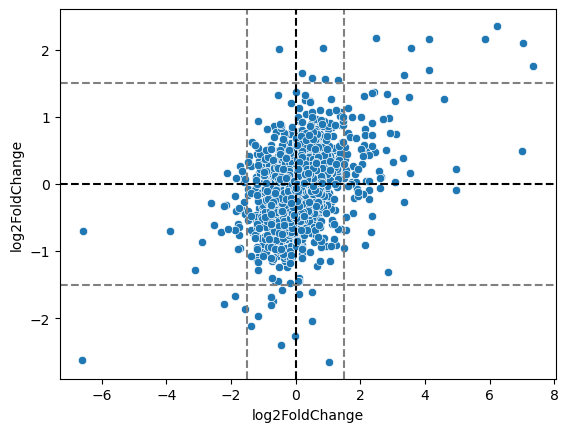

In [28]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Genewise log2-fold change in \n Sorghum Drought')

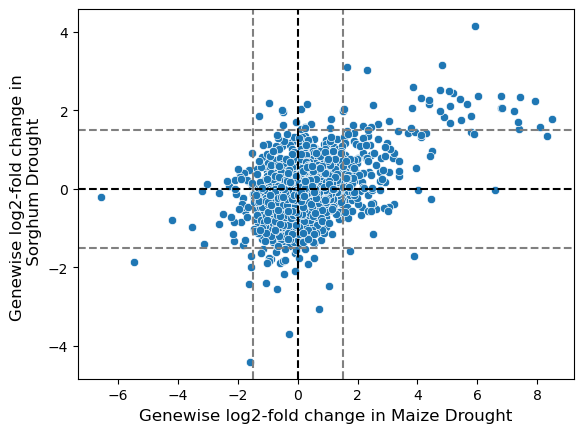

In [30]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Genewise log2-fold change in Maize Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in \n Sorghum Drought", fontsize = 12)

In [387]:
new_merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]

In [388]:
new_merged_result['Classification'] = 'Non-substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_2387550/1856289886.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation

Text(0, 0.5, 'Genewise log2-fold change in Sorghum Drought')

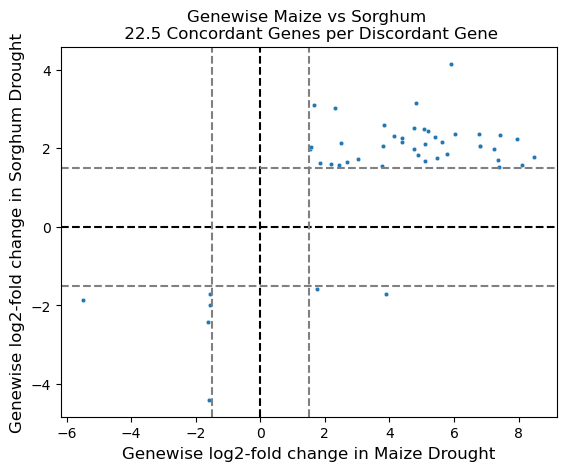

In [390]:
sns.scatterplot(data = new_merged_result.loc[new_merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10 )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Genewise Maize vs Sorghum \n 22.5 Concordant Genes per Discordant Gene')
plt.xlabel("Genewise log2-fold change in Maize Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in Sorghum Drought", fontsize = 12)

In [389]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

22.5

In [342]:
all_over_1

,Tomato,Arabi
128,5.420722,2.289623
163,2.688214,1.658393
165,1.529409,1.995355
351,6.788676,2.372646
582,7.428141,2.349108
660,4.131078,2.303250
847,4.748212,2.510446
968,5.096113,2.105806
1064,3.039029,1.728921
1218,2.317202,3.015622


In [343]:
all_under_1

,Tomato,Arabi
1302,-1.546548,-1.996698
3401,-1.570759,-1.713524
4504,-1.584948,-4.405051
4944,-5.482556,-1.861803
5162,-1.628072,-2.431291


In [344]:
merged_result

,Tomato,Arabi
0,-0.145039,0.054831
1,-0.023699,-0.092506
2,0.074602,-0.769619
3,-0.647447,-0.563822
4,-0.407818,-0.445230
...,...,...
3199,2.262803,0.036704
3200,0.376672,0.168016
3201,0.401132,0.728854
3202,-0.146726,-0.288193


In [345]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

pos_thresh = 0
neg_thresh = 0
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.6387687188019967
0.6387687188019967
0.6387687188019967
0.6387687188019967


In [346]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

SignificanceResult(statistic=0.3778838983240342, pvalue=2.6260518647079396e-203)

In [347]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [348]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [349]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

5

In [350]:
up_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
114446at3193,1241.209942,3.515908,0.459146,7.657494,1.895955e-14,3.277839e-13
118011at3193,572.664338,2.646269,0.254130,10.413035,2.162169e-25,1.102920e-23
118239at3193,218.445035,2.275324,0.171891,13.236980,5.366364e-40,6.143890e-38
118532at3193,1725.105212,2.161990,0.139590,15.488117,4.173376e-54,1.023868e-51
127999at3193,39.111363,2.056699,0.405571,5.071118,3.954849e-07,2.217125e-06
136845at3193,242.212243,2.145751,0.298576,7.186620,6.641495e-13,9.452205e-12
137296at3193,707.220252,2.480940,0.193344,12.831742,1.088883e-37,1.121985e-35
138520at3193,44.488378,4.133091,0.588411,7.024155,2.153657e-12,2.760110e-11
139009at3193,99.410629,2.081851,0.330890,6.291672,3.140650e-10,2.958068e-09
139101at3193,78.287068,2.997948,0.494597,6.061394,1.349466e-09,1.164564e-08


In [351]:
up_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
137296at3193,2161.067885,2.174250,0.528502,4.113983,3.888909e-05,5.491535e-04
138520at3193,76.412410,2.153709,0.393055,5.479408,4.267515e-08,1.911330e-06
402643at3193,166.541104,2.019380,0.352363,5.730967,9.985962e-09,5.466390e-07
404029at3193,194.154600,2.164346,0.350151,6.181175,6.362634e-10,5.037842e-08
649605at3193,47.270308,2.015115,0.408406,4.934102,8.052030e-07,2.190350e-05
685441at3193,81.660743,2.091774,0.416022,5.028042,4.955136e-07,1.445465e-05


In [352]:
up

,sorghum Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol
100,LOC8079693,195.258840,2.983458,0.416281,7.166938,7.669375e-13,1.113223e-11,Zm00001d034723
128,LOC8057046,2520.801630,5.420722,0.532738,10.175209,2.558510e-24,1.155618e-22,Zm00001d034643
163,LOC8057096,41.640932,2.688214,0.455019,5.907911,3.464740e-09,3.055697e-08,Zm00001d034571
304,LOC8060482,183.413908,3.368102,0.296143,11.373238,5.683920e-30,3.862100e-28,Zm00001d033990
319,LOC110436814,41370.139495,2.435272,0.166060,14.664978,1.080524e-48,2.059321e-46,Zm00001d033931
...,...,...,...,...,...,...,...,...
5726,LOC8070713,1006.526721,2.215971,0.333194,6.650688,2.917258e-11,3.443422e-10,Zm00001d045392
5747,LOC8071335,1115.939142,2.910148,0.192626,15.107733,1.440095e-51,3.246030e-49,Zm00001d045311
5759,LOC8076148,63.523609,2.440673,0.484010,5.042613,4.592178e-07,2.807768e-06,Zm00001d045204
5776,LOC8065428,25.333567,3.370250,0.568750,5.925710,3.109504e-09,2.760053e-08,Zm00001d037080


In [353]:
up_arabi

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,maize Symbol,sorghum Symbol
128,9124,3100.928023,2.289623,0.461379,4.962561,6.956980e-07,2.118509e-05,Zm00001d034643,LOC8057046
964,5026,2995.168619,2.039980,0.150657,13.540539,9.012488e-42,1.756444e-37,Zm00001d032293,LOC8080108
968,48187,94.957402,2.105806,0.487992,4.315252,1.594213e-05,2.832235e-04,Zm00001d029349,LOC8080751
1271,14949,497.115989,3.143004,0.753548,4.170939,3.033474e-05,4.760014e-04,Zm00001d028408,LOC8054347
1842,38483,198.980996,2.434358,0.367586,6.622557,3.530374e-11,4.169907e-09,Zm00001d005283,LOC8062599
2523,10803,4971.656556,2.025416,0.276492,7.325419,2.381541e-13,4.945837e-11,Zm00001d039315,LOC8081371
2591,13898,4238.575944,2.140743,0.519352,4.121947,3.756841e-05,5.671346e-04,Zm00001d039566,LOC8078754
2609,37520,47.242209,2.009489,0.416134,4.828946,1.372575e-06,3.794341e-05,Zm00001d039634,LOC8078789
2665,32132,972.246781,3.103060,0.639684,4.850928,1.228853e-06,3.460856e-05,Zm00001d039942,LOC8061349
2977,68022,552.870627,2.066635,0.272540,7.582869,3.379950e-14,9.541208e-12,Zm00001d044124,LOC8058201


In [354]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)

KeyError: 'arabidopsis Symbol'